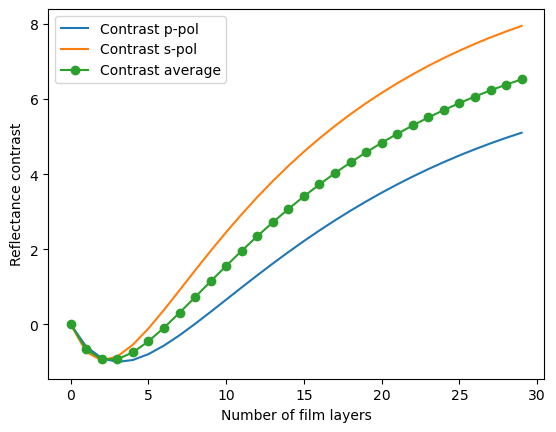

[ 0.         -0.66343099 -0.92988298 -0.92591686 -0.74421256 -0.45004932
 -0.08834615  0.3104587   0.72598864  1.14477175  1.55804302  1.96023363
  2.3479384   2.71921096  3.07308269  3.40923372  3.72776792  4.02905874
  4.31364381  4.58215308  4.83526007  5.07364925  5.29799443  5.50894492
  5.7071171   5.8930896   6.06740111  6.23054988  6.38299442  6.52515503]


In [65]:
import transfer_matrix_contrast as tmm
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Define parameters
wavelength = 632.992   # nm
incident_angle = 32.5  # degrees

# Suppose the TMD film thickness is varied in increments of 0.82 nm:
N_layers = np.arange(0, 30)  # 0..50 layers
film_thickness_per_layer = 0.82  # nm
film_thicknesses_nm = film_thickness_per_layer * N_layers

# Refractive indices: [air, TMD, SiO2, Si]
n_air = 1.0003
n_film = 4.19 - 2.03j   # TMD (e.g. 1T'-MoTe2)
n_buffer = 4.7042-1.0629j # another material, in this case MoSe2
n_SiO2 = 1.4689
n_Si = 3.872 - 0.01637j

# The thickness list: first is TMD film (variable), second is buffer (10nm), third is SiO2 (90 nm)
# So the full stack is: air | TMD1 | buffer | SiO2 | Si
# => n_list = [n_air, n_film, n_buffer, n_SiO2, n_Si]
# => d_list = [d_film, 10nm, 90 nm]
# baseline: air | buffer | SiO2 | Si
# => skip n_film, skip d_film
# => n_list_base = [n_air, n_buffer, n_SiO2, n_Si]
# => d_list_base = [10nm, 90 nm]

refractive_indices = [n_air, n_film, n_buffer, n_SiO2, n_Si]

# We'll collect results in arrays
Cp_vals = []
Cs_vals = []
Cnp_vals = []

for thickness_film in film_thicknesses_nm:
    thicknesses_nm = [thickness_film,0.7, 90]  # film + buffer + 90 nm SiO2
    cp, cs, cnp = tmm.Contrast_TMM(wavelength, incident_angle,
                                     refractive_indices, thicknesses_nm)
    # Each is a scalar for this single thickness
    Cp_vals.append(cp)
    Cs_vals.append(cs)
    Cnp_vals.append(cnp)

Cp_vals = np.array(Cp_vals)
Cs_vals = np.array(Cs_vals)
Cnp_vals = np.array(Cnp_vals)

# Plot
plt.figure()
plt.plot(N_layers, Cp_vals, label='Contrast p-pol')
plt.plot(N_layers, Cs_vals, label='Contrast s-pol')
plt.plot(N_layers, Cnp_vals, 'o-', label='Contrast average')
plt.xlabel("Number of film layers")
plt.ylabel("Reflectance contrast")
plt.legend()
plt.show()

print(Cnp_vals)